# Image Classification

## Rock-Paper-Scissors Dataset

In [ ]:
# لتفعيل رفع الملف
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alaashorbaji","key":"f9eab450ac83b0d23640b302ec6436b2"}'}

In [ ]:
# إنشاء المجلد وإعطاء الصلاحيات
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# تحميل داتا Rock Paper Scissors
!kaggle datasets download -d drgfreeman/rockpaperscissors

Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
 82% 251M/306M [00:00<00:00, 730MB/s] 
100% 306M/306M [00:01<00:00, 262MB/s]


In [ ]:
# فك الضغط عن الملف المضغوط
!unzip -q rockpaperscissors.zip

## ImageDataGenerator

In [ ]:
data_dir = "/content/rps-cv-images"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Visualize Samples

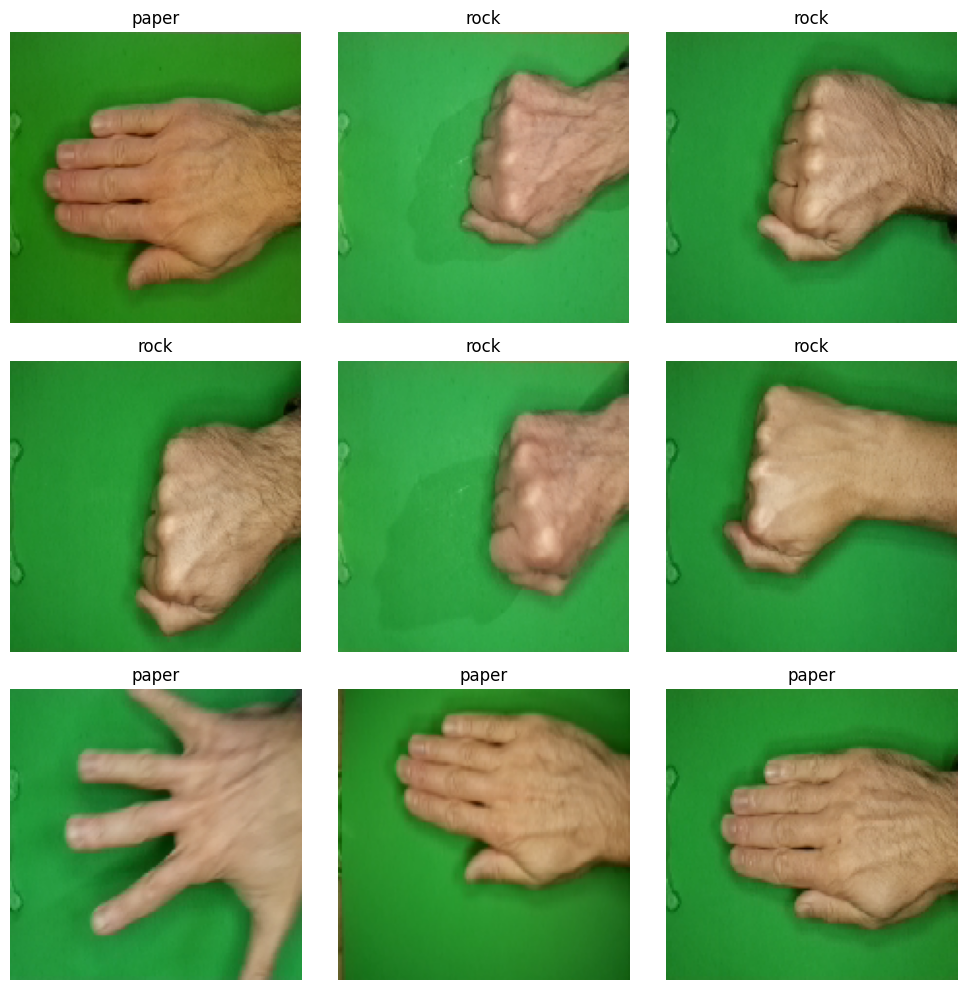

In [ ]:
import matplotlib.pyplot as plt

# الحصول على صورة وملصق من مجموعة التدريب
images, labels = next(train_gen)

# أسماء الفئات
class_names = list(train_gen.class_indices.keys())

# عرض أول 9 صور
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    label_index = labels[i].argmax()
    plt.title(class_names[label_index])
    plt.axis("off")

plt.tight_layout()
plt.show()


## Simple CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 فئات
])

# تجميع النموذج
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# عرض ملخص النموذج
model.summary()

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,328,067 (20.32 MB)

 Trainable params: 5,328,067 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4520 - loss: 1.2760

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.4550 - loss: 1.2693 - val_accuracy: 0.8078 - val_loss: 0.5334
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.8503 - loss: 0.4478 - val_accuracy: 0.8810 - val_loss: 0.3466
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9204 - loss: 0.2437 - val_accuracy: 0.9336 - val_loss: 0.2437
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9618 - loss: 0.1153 - val_accuracy: 0.9176 - val_loss: 0.2279
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9817 - loss: 0.0847 - val_accuracy: 0.9336 - val_loss: 0.1788
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9840 - loss: 0.0572 - val_accuracy: 0.9428 - val_loss: 0.1828
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9910 - loss: 0.0338 - val_accuracy: 0.9474 - val_loss: 0.2020
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9474 - val_lo

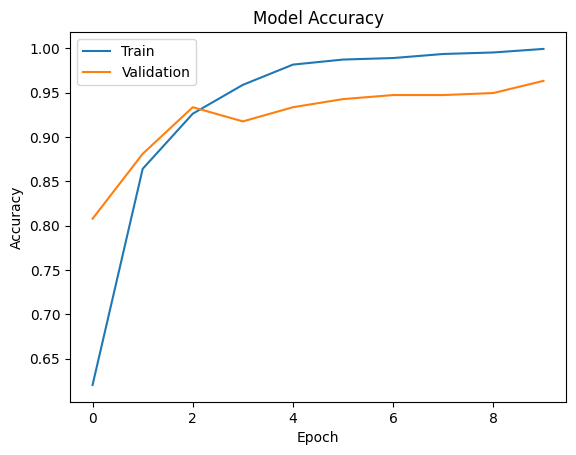

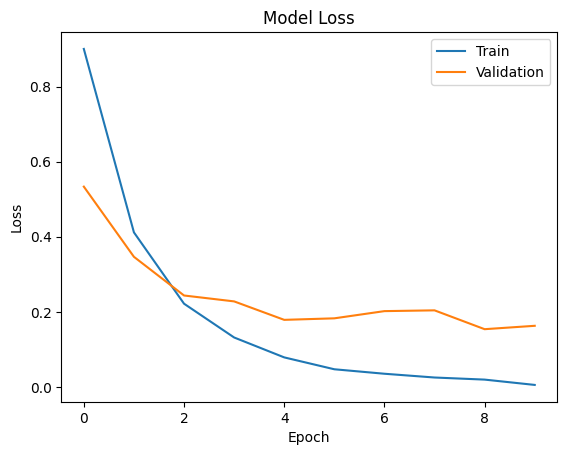

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step
✅ Accuracy on validation set: 0.9634

Classification Report:
              precision    recall  f1-score   support

       paper       0.95      0.94      0.95       142
        rock       0.97      0.97      0.97       145
    scissors       0.97      0.97      0.97       150

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437



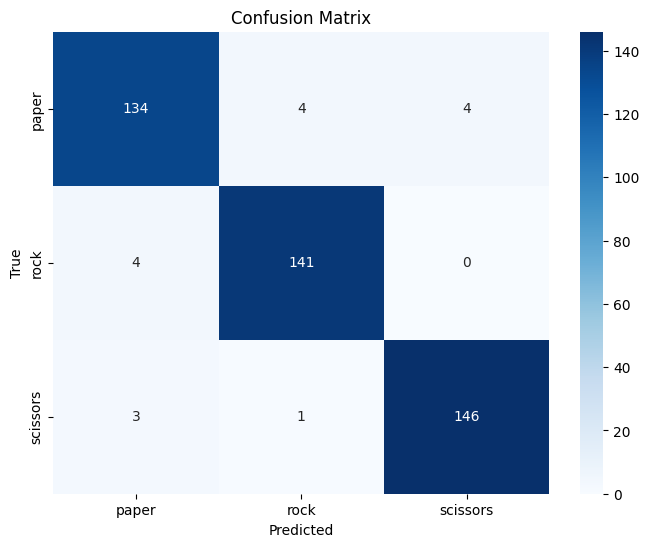

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# ✅ Visualization of Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ✅ Visualization of Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ✅ Get all validation images and labels
val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

# ✅ Predictions
y_pred_probs = model.predict(val_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# ✅ Accuracy
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"✅ Accuracy on validation set: {acc:.4f}")

# ✅ Classification Report
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## LeNet-5

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,931 (8.52 MB)

 Trainable params: 2,232,931 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.5766 - loss: 1.1795 - val_accuracy: 0.8627 - val_loss: 0.3784
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9117 - loss: 0.3033 - val_accuracy: 0.9199 - val_loss: 0.2769
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9099 - loss: 0.2926 - val_accuracy: 0.9451 - val_loss: 0.1951
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9406 - loss: 0.1852 - val_accuracy: 0.9497 - val_loss: 0.1847
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9556 - loss: 0.1465 - val_accuracy: 0.9291 - val_loss: 0.1984
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9531 - loss: 0.1414 - val_accuracy: 0.9336 - val_loss: 0.2121
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9587 - loss: 0.1435 - val_accuracy: 0.9474 - val_loss: 0.1605
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9549 - loss: 0.1515 - val_accuracy: 0.951

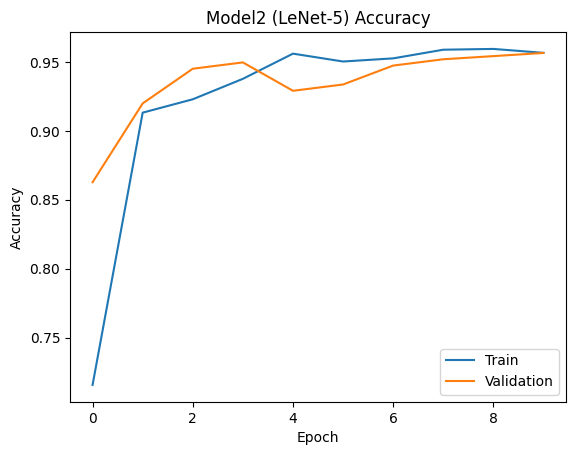

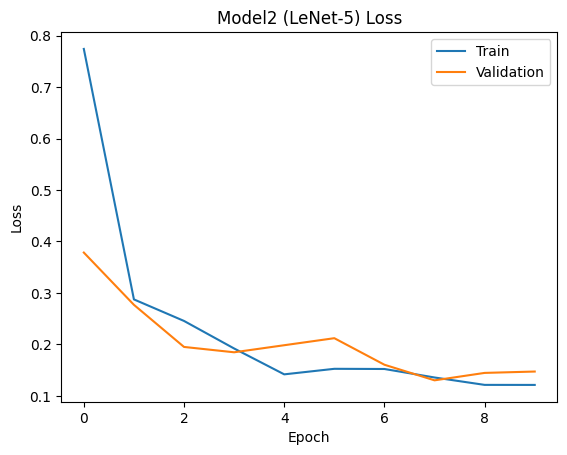

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
✅ Model2 Accuracy: 0.9565

Classification Report:
              precision    recall  f1-score   support

       paper       0.97      0.92      0.95       142
        rock       0.97      0.98      0.98       145
    scissors       0.93      0.97      0.95       150

    accuracy                           0.96       437
   macro avg       0.96      0.96      0.96       437
weighted avg       0.96      0.96      0.96       437



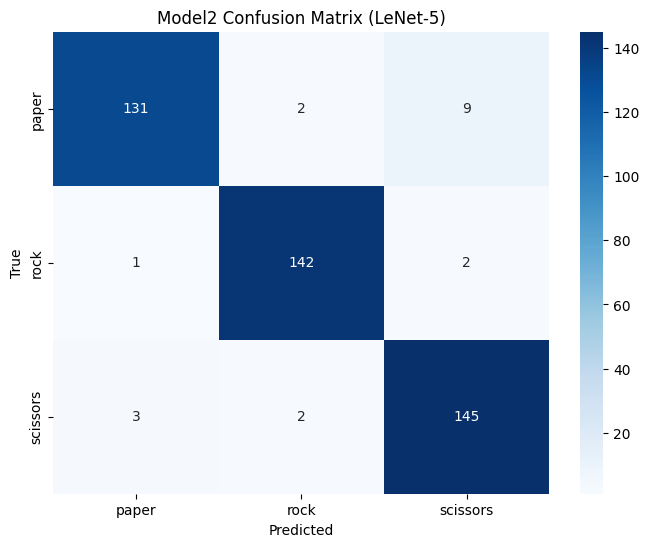

In [ ]:
# ✅ استيراد المكتبات
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# ✅ بناء نموذج LeNet-5 المعدّل
model2 = Sequential([
    Conv2D(6, kernel_size=5, activation='tanh', input_shape=(150, 150, 3)),
    AveragePooling2D(pool_size=2),
    Conv2D(16, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=2),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(3, activation='softmax')  # عدد الفئات = 3
])

# ✅ تجميع النموذج
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# ✅ عرض ملخص النموذج
model2.summary()

# ✅ تدريب النموذج
history2 = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

# ✅ رسم دقة وخسارة النموذج
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title('Model2 (LeNet-5) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title('Model2 (LeNet-5) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ✅ تجميع صور التحقق والتوقعات
val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

# ✅ توقع الفئات
y_pred_probs = model2.predict(val_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# ✅ دقة النموذج
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"✅ Model2 Accuracy: {acc:.4f}")

# ✅ تقرير التصنيف
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# ✅ مصفوفة الالتباس
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model2 Confusion Matrix (LeNet-5)")
plt.show()


## AlexNet

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 38, 38, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,982,083 (114.37 MB)

 Trainable params: 29,982,083 (114.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.4497 - loss: 1.5251 - val_accuracy: 0.8627 - val_loss: 0.3972
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9034 - loss: 0.2869 - val_accuracy: 0.9680 - val_loss: 0.1213
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9529 - loss: 0.1443 - val_accuracy: 0.9840 - val_loss: 0.0671
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9760 - loss: 0.0811 - val_accuracy: 0.9771 - val_loss: 0.0758
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9668 - loss: 0.1039 - val_accuracy: 0.9703 - val_loss: 0.0977
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9766 - loss: 0.0882 - val_accuracy: 0.9748 - val_loss: 0.0844
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9839 - loss: 0.0662 - val_accuracy: 0.8719 - val_loss: 0.3937
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9553 - loss: 0.2061 - val_accuracy: 0.

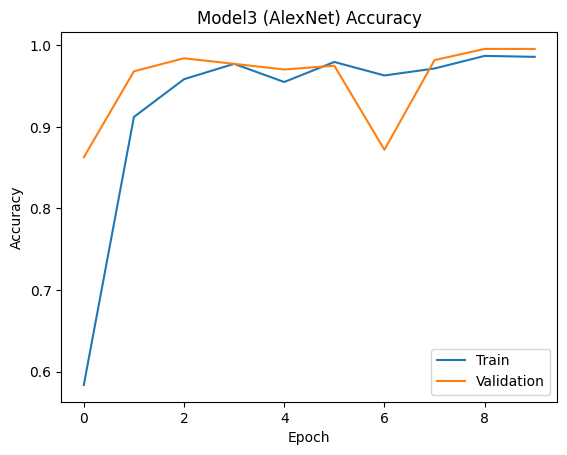

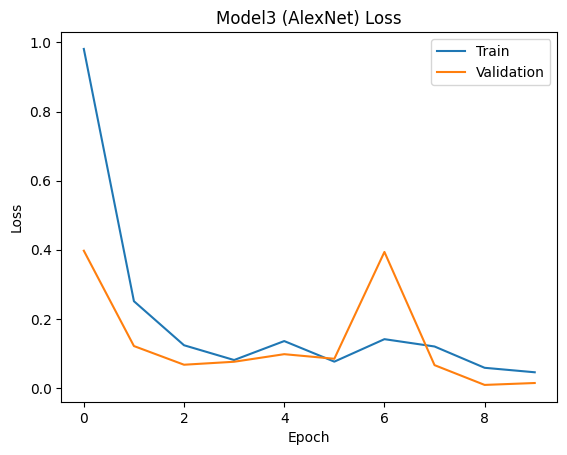

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
✅ Model3 Accuracy: 0.9954

Classification Report:
              precision    recall  f1-score   support

       paper       0.99      1.00      0.99       142
        rock       1.00      0.99      0.99       145
    scissors       1.00      1.00      1.00       150

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



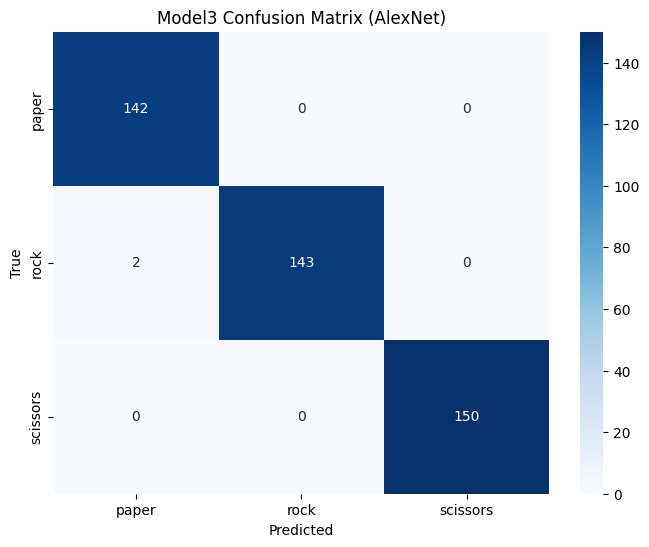

In [ ]:
# ✅ استيراد الطبقات
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# ✅ بناء نموذج AlexNet المعدّل لحجم 150x150
model3 = Sequential([
    Input(shape=(150, 150, 3)),

    Conv2D(96, kernel_size=11, strides=4, activation='relu', padding='same'),
    MaxPooling2D(pool_size=3, strides=2),

    Conv2D(256, kernel_size=5, activation='relu', padding='same'),
    MaxPooling2D(pool_size=3, strides=2),

    Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=3, strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# ✅ تجميع النموذج
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

# ✅ تدريب النموذج
history3 = model3.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

# ✅ عرض Accuracy و Loss
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.title('Model3 (AlexNet) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Validation')
plt.title('Model3 (AlexNet) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ✅ التقييم على بيانات التحقق
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

y_pred_probs = model3.predict(val_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"✅ Model3 Accuracy: {acc:.4f}")

class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model3 Confusion Matrix (AlexNet)")
plt.show()


## VGG16 (Transfer Learning)

In [ ]:
# ✅ استيراد الأدوات
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ✅ تحميل VGG16 بدون الطبقة العلوية (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# ✅ تجميد كل الطبقات الأساسية
for layer in base_model.layers:
    layer.trainable = False

# ✅ إضافة الطبقات المخصصة
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model4 = Model(inputs=base_model.input, outputs=output)

# ✅ تجميع النموذج
model4.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

# ✅ تدريب النموذج
history4 = model4.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 404ms/step - accuracy: 0.3901 - loss: 1.1902 - val_accuracy: 0.9336 - val_loss: 0.8045
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.6126 - loss: 0.8547 - val_accuracy: 0.9565 - val_loss: 0.5915
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8016 - loss: 0.6244 - val_accuracy: 0.9634 - val_loss: 0.4445
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8920 - loss: 0.4771 - val_accuracy: 0.9657 - val_loss: 0.3446
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.9427 - loss: 0.3596 - val_accuracy: 0.9611 - val_loss: 0.2802
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9504 - loss: 0.2936 - val_accuracy: 0.9794 - val_loss: 0.2267
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9502 - loss: 0.2686 - val_accuracy: 0.9817 - val_loss: 0.1908
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9634 - loss: 0.2178 - val_accuracy: 0

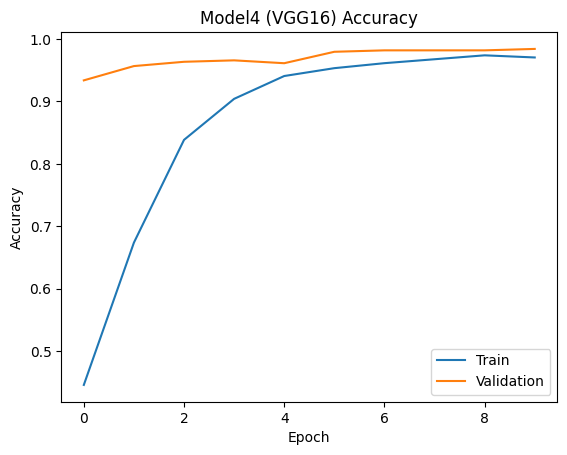

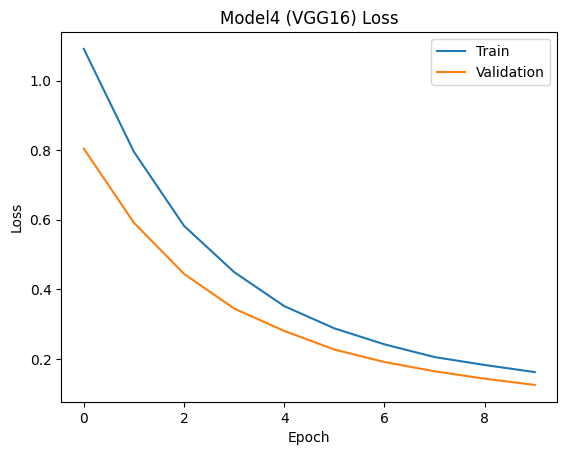

In [ ]:
# ✅ Accuracy
import matplotlib.pyplot as plt

plt.plot(history4.history['accuracy'], label='Train')
plt.plot(history4.history['val_accuracy'], label='Validation')
plt.title('Model4 (VGG16) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ✅ Loss
plt.plot(history4.history['loss'], label='Train')
plt.plot(history4.history['val_loss'], label='Validation')
plt.title('Model4 (VGG16) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step
✅ Model4 Accuracy: 0.9840

Classification Report:
              precision    recall  f1-score   support

       paper       1.00      0.96      0.98       142
        rock       0.99      1.00      1.00       145
    scissors       0.96      0.99      0.98       150

    accuracy                           0.98       437
   macro avg       0.98      0.98      0.98       437
weighted avg       0.98      0.98      0.98       437



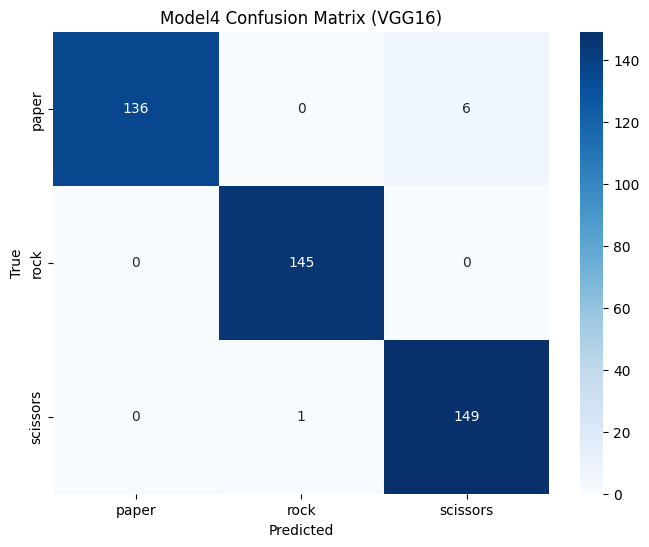

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# تجميع بيانات التحقق
val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

# توقع
y_pred_probs = model4.predict(val_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# دقة
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"✅ Model4 Accuracy: {acc:.4f}")

# تقرير التصنيف
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# مصفوفة الالتباس
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model4 Confusion Matrix (VGG16)")
plt.show()


## VGG16(Fine-Tuning)

In [ ]:
# ✅ فك التجميد عن آخر 4 طبقات فقط
for layer in base_model.layers[-4:]:
    layer.trainable = True

# ✅ إعادة تجميع النموذج (بعد فك التجميد)
model4.compile(optimizer=Adam(learning_rate=1e-5),  # LR صغير جدًا في fine-tuning
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# ✅ إعادة التدريب
history4_finetune = model4.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  # نبدأ بعدد قليل من الإيبوكس
    verbose=1
)


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9826 - loss: 0.0823 - val_accuracy: 0.9977 - val_loss: 0.0193
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9922 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.9974 - loss: 0.0106 - val_accuracy: 0.9977 - val_loss: 0.0054
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9977 - val_loss: 0.0031


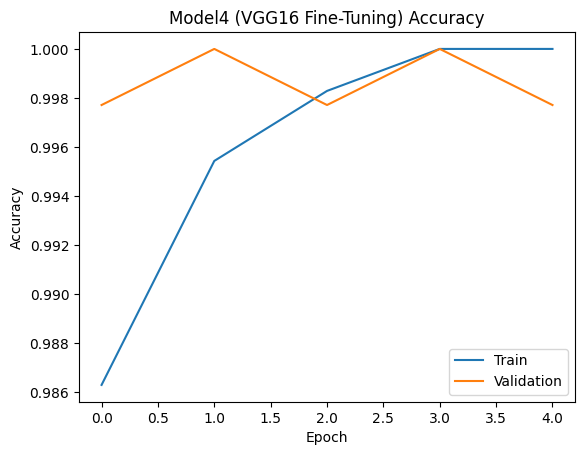

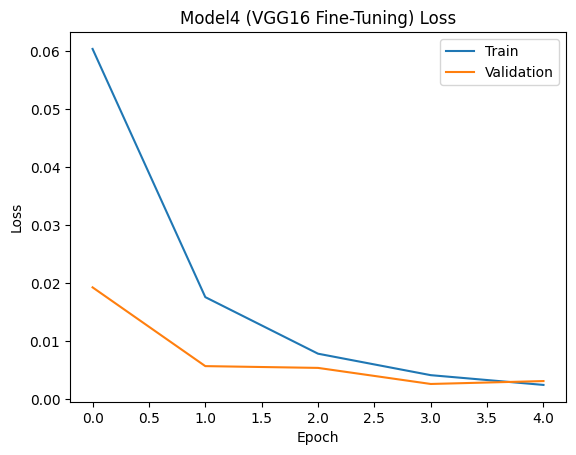

In [ ]:
# ✅ Accuracy
plt.plot(history4_finetune.history['accuracy'], label='Train')
plt.plot(history4_finetune.history['val_accuracy'], label='Validation')
plt.title('Model4 (VGG16 Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ✅ Loss
plt.plot(history4_finetune.history['loss'], label='Train')
plt.plot(history4_finetune.history['val_loss'], label='Validation')
plt.title('Model4 (VGG16 Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## InceptionV3 (GoogleNet style – Transfer Learning)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ✅ تحميل النموذج بدون الطبقة العلوية
base_model5 = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# ✅ تجميد جميع الطبقات
for layer in base_model5.layers:
    layer.trainable = False

# ✅ إضافة الطبقات العلوية
x = base_model5.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model5 = Model(inputs=base_model5.input, outputs=output)

# ✅ تجميع النموذج
model5.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

# ✅ تدريب النموذج
history5 = model5.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 74, 74,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 35, 35,    │      5,120 │ max_pooling2d_5[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 22,328,099 (85.17 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - accuracy: 0.6926 - loss: 0.7467 - val_accuracy: 0.9657 - val_loss: 0.1290
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.9630 - loss: 0.1326 - val_accuracy: 0.9817 - val_loss: 0.0771
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9742 - loss: 0.0890 - val_accuracy: 0.9840 - val_loss: 0.0603
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9787 - loss: 0.0665 - val_accuracy: 0.9817 - val_loss: 0.0501
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9850 - loss: 0.0522 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9873 - loss: 0.0414 - val_accuracy: 0.9863 - val_loss: 0.0399
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9942 - loss: 0.0308 - val_accuracy:

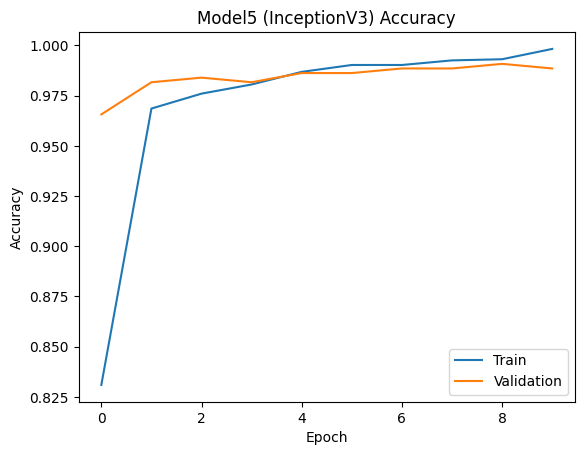

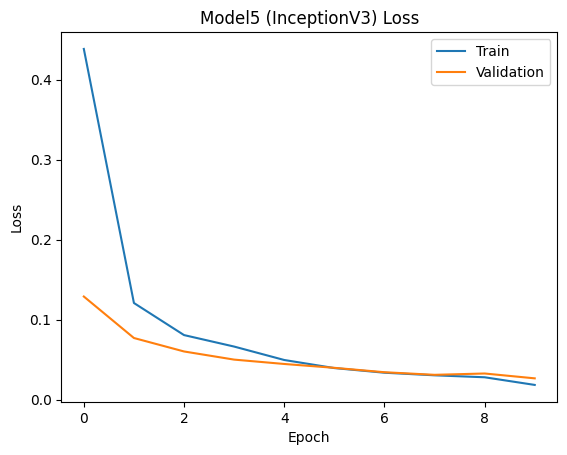

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history5.history['accuracy'], label='Train')
plt.plot(history5.history['val_accuracy'], label='Validation')
plt.title('Model5 (InceptionV3) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history5.history['loss'], label='Train')
plt.plot(history5.history['val_loss'], label='Validation')
plt.title('Model5 (InceptionV3) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 641ms/step
✅ Model5 Accuracy: 0.9886

Classification Report:
              precision    recall  f1-score   support

       paper       0.98      0.99      0.99       142
        rock       1.00      0.99      0.99       145
    scissors       0.99      0.99      0.99       150

    accuracy                           0.99       437
   macro avg       0.99      0.99      0.99       437
weighted avg       0.99      0.99      0.99       437



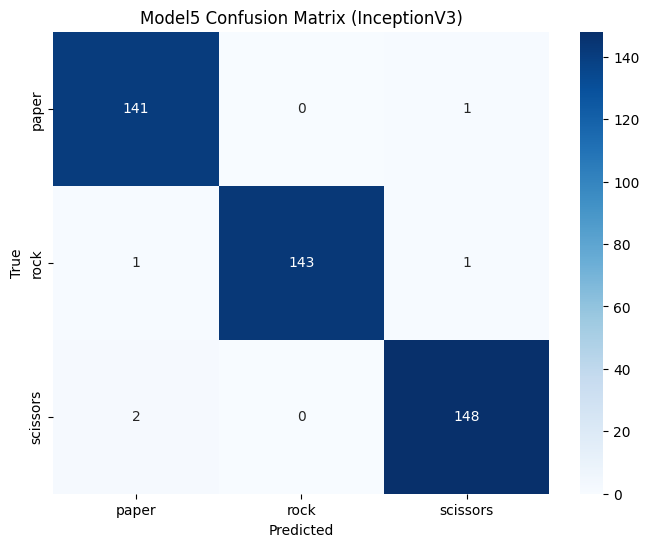

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

y_pred_probs = model5.predict(val_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"✅ Model5 Accuracy: {acc:.4f}")

class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model5 Confusion Matrix (InceptionV3)")
plt.show()


## InceptionV3(Fine-Tuning)

In [ ]:
# ✅ فك التجميد عن آخر 30 طبقة من InceptionV3
for layer in base_model5.layers[-30:]:
    layer.trainable = True

# ✅ إعادة تجميع النموذج مع Learning Rate صغير
model5.compile(optimizer=Adam(learning_rate=1e-5),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# ✅ إعادة التدريب
history5_finetune = model5.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  # عدد قليل من الإيبوكس للتنغيم
    verbose=1
)


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 437ms/step - accuracy: 0.9607 - loss: 0.1732 - val_accuracy: 0.9863 - val_loss: 0.0344
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9882 - loss: 0.0770 - val_accuracy: 0.9954 - val_loss: 0.0296
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9893 - loss: 0.0557 - val_accuracy: 0.9977 - val_loss: 0.0290
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.9951 - loss: 0.0366 - val_accuracy: 0.9954 - val_loss: 0.0283
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.9959 - loss: 0.0309 - val_accuracy: 0.9954 - val_loss: 0.0255


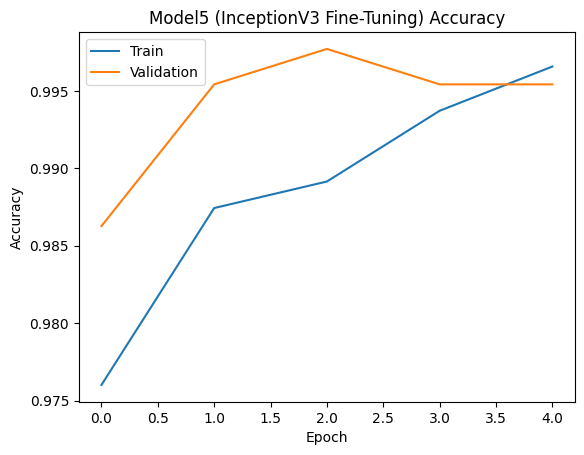

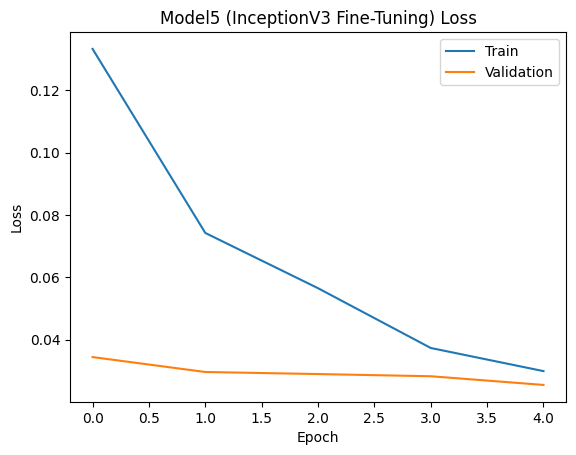

In [ ]:
# ✅ Accuracy
plt.plot(history5_finetune.history['accuracy'], label='Train')
plt.plot(history5_finetune.history['val_accuracy'], label='Validation')
plt.title('Model5 (InceptionV3 Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ✅ Loss
plt.plot(history5_finetune.history['loss'], label='Train')
plt.plot(history5_finetune.history['val_loss'], label='Validation')
plt.title('Model5 (InceptionV3 Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step
✅ Model5 Fine-Tuned Accuracy: 0.9954

Classification Report (Fine-Tuned):
              precision    recall  f1-score   support

       paper       0.99      0.99      0.99       142
        rock       0.99      1.00      1.00       145
    scissors       1.00      0.99      1.00       150

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



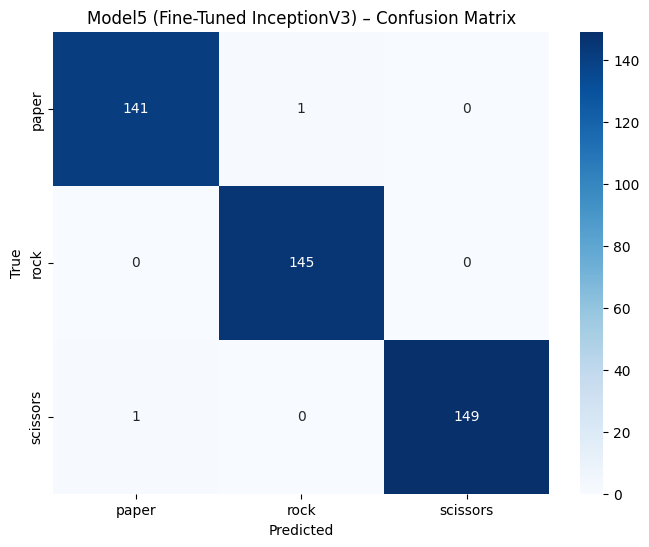

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ تجميع بيانات التحقق
val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

# ✅ توقعات النموذج (بعد Fine-Tuning)
y_pred_probs_ft = model5.predict(val_images)
y_pred_classes_ft = np.argmax(y_pred_probs_ft, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# ✅ دقة النموذج
acc_ft = accuracy_score(y_true_classes, y_pred_classes_ft)
print(f"✅ Model5 Fine-Tuned Accuracy: {acc_ft:.4f}")

# ✅ تقرير التصنيف
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report (Fine-Tuned):")
print(classification_report(y_true_classes, y_pred_classes_ft, target_names=class_names))

# ✅ مصفوفة الالتباس
cm_ft = confusion_matrix(y_true_classes, y_pred_classes_ft)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ft, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model5 (Fine-Tuned InceptionV3) – Confusion Matrix")
plt.show()


## ResNet50 (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ✅ تحميل ResNet50 بدون الطبقة العلوية
base_model6 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# ✅ تجميد جميع الطبقات
for layer in base_model6.layers:
    layer.trainable = False

# ✅ بناء الرأس العلوي
x = base_model6.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model6 = Model(inputs=base_model6.input, outputs=output)

# ✅ تجميع النموذج
model6.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model6.summary()

# ✅ التدريب
history6 = model6.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 405ms/step - accuracy: 0.3264 - loss: 1.2969 - val_accuracy: 0.3249 - val_loss: 1.1062
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3163 - loss: 1.2086 - val_accuracy: 0.3410 - val_loss: 1.0913
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.3420 - loss: 1.1459 - val_accuracy: 0.3432 - val_loss: 1.0898
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.3365 - loss: 1.1406 - val_accuracy: 0.3432 - val_loss: 1.0847
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.3415 - loss: 1.1202 - val_accuracy: 0.3432 - val_loss: 1.0805
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.3569 - loss: 1.1019 - val_accuracy: 0.3432 - val_loss: 1.0751
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.3564 - loss: 1.1063 - val_accuracy: 0.5584 - val_loss: 1.0723
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.4009 - loss: 1.0821 - val_accuracy: 

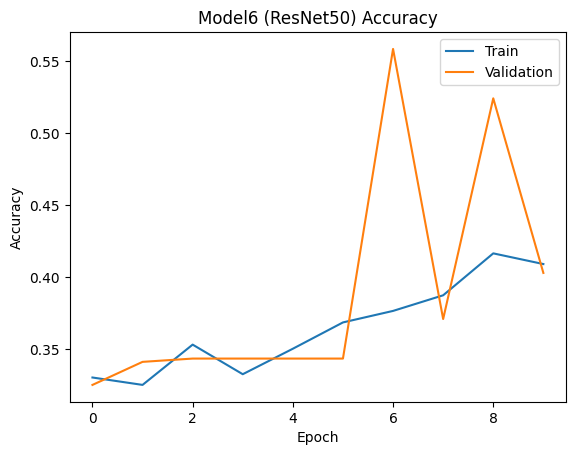

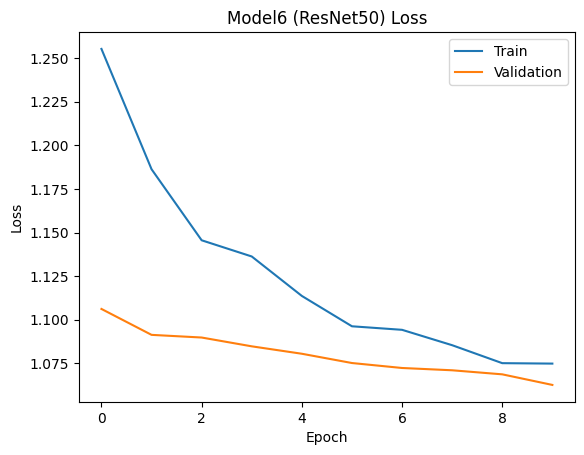

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history6.history['accuracy'], label='Train')
plt.plot(history6.history['val_accuracy'], label='Validation')
plt.title('Model6 (ResNet50) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history6.history['loss'], label='Train')
plt.plot(history6.history['val_loss'], label='Validation')
plt.title('Model6 (ResNet50) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step
✅ Model6 Accuracy: 0.4027

Classification Report:
              precision    recall  f1-score   support

       paper       0.35      0.99      0.52       142
        rock       1.00      0.01      0.03       145
    scissors       0.97      0.22      0.36       150

    accuracy                           0.40       437
   macro avg       0.77      0.41      0.30       437
weighted avg       0.78      0.40      0.30       437



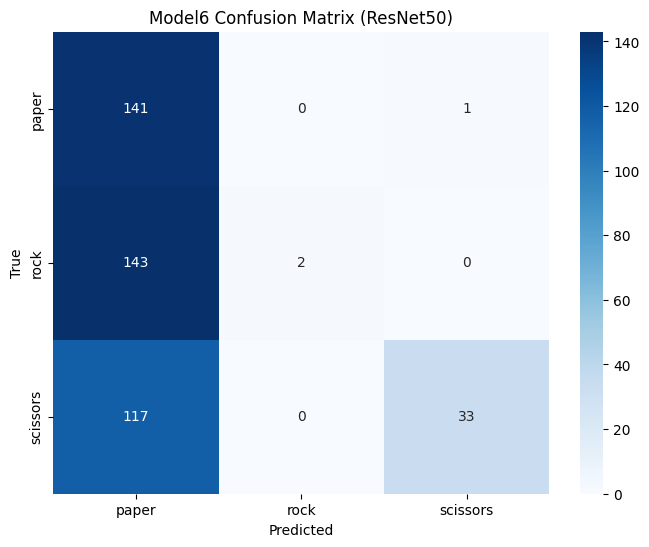

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# ✅ تجميع بيانات التحقق
val_images, val_labels = next(val_gen)
for i in range(1, val_gen.__len__()):
    imgs, labels = next(val_gen)
    val_images = np.concatenate((val_images, imgs))
    val_labels = np.concatenate((val_labels, labels))

# ✅ التوقع
y_pred_probs6 = model6.predict(val_images)
y_pred_classes6 = np.argmax(y_pred_probs6, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# ✅ الدقة
acc6 = accuracy_score(y_true_classes, y_pred_classes6)
print(f"✅ Model6 Accuracy: {acc6:.4f}")

# ✅ التقرير
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes6, target_names=class_names))

# ✅ مصفوفة الالتباس
cm6 = confusion_matrix(y_true_classes, y_pred_classes6)
plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model6 Confusion Matrix (ResNet50)")
plt.show()


## Fine-Tuning Model6 – ResNet50

In [ ]:
# ✅ فك التجميد عن آخر 30 طبقة
for layer in base_model6.layers[-30:]:
    layer.trainable = True

# ✅ إعادة تجميع النموذج
model6.compile(optimizer=Adam(learning_rate=1e-5),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# ✅ إعادة التدريب بعد فك التجميد
history6_finetune = model6.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 355ms/step - accuracy: 0.7060 - loss: 0.7555 - val_accuracy: 0.3455 - val_loss: 1.0625
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9459 - loss: 0.2016 - val_accuracy: 0.3432 - val_loss: 1.2797
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9725 - loss: 0.1132 - val_accuracy: 0.3638 - val_loss: 1.2907
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.9785 - loss: 0.0858 - val_accuracy: 0.6270 - val_loss: 0.8425
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9792 - loss: 0.0692 - val_accuracy: 0.5561 - val_loss: 0.6550


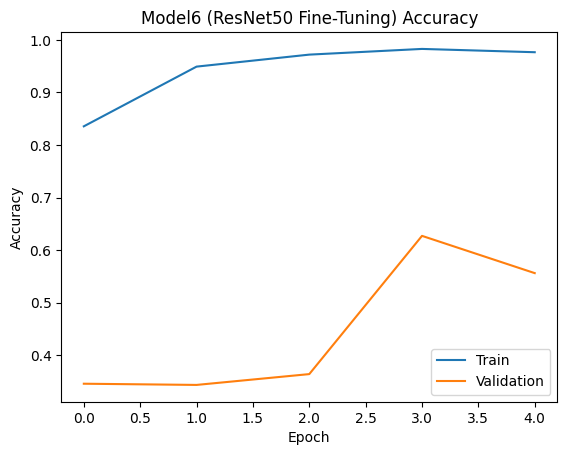

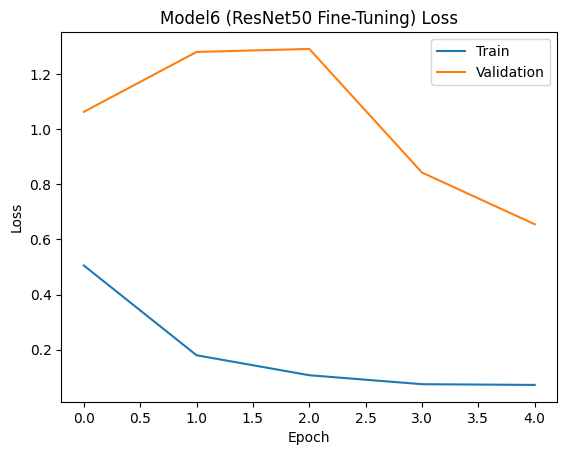

In [ ]:
# ✅ Accuracy
plt.plot(history6_finetune.history['accuracy'], label='Train')
plt.plot(history6_finetune.history['val_accuracy'], label='Validation')
plt.title('Model6 (ResNet50 Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ✅ Loss
plt.plot(history6_finetune.history['loss'], label='Train')
plt.plot(history6_finetune.history['val_loss'], label='Validation')
plt.title('Model6 (ResNet50 Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step
✅ Model6 Fine-Tuned Accuracy: 0.5561

Classification Report (Fine-Tuned):
              precision    recall  f1-score   support

       paper       0.42      1.00      0.59       142
        rock       1.00      0.14      0.25       145
    scissors       1.00      0.53      0.70       150

    accuracy                           0.56       437
   macro avg       0.81      0.56      0.51       437
weighted avg       0.81      0.56      0.52       437



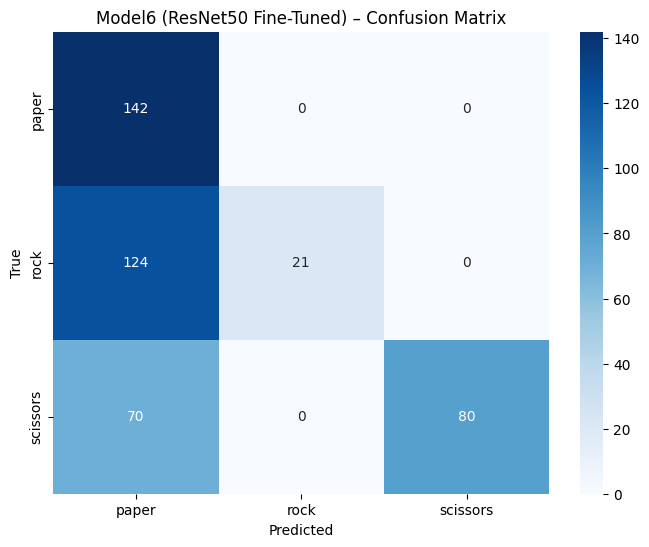

In [ ]:
# ✅ توقع على بيانات التحقق
y_pred_probs6_ft = model6.predict(val_images)
y_pred_classes6_ft = np.argmax(y_pred_probs6_ft, axis=1)

# ✅ الدقة
acc6_ft = accuracy_score(y_true_classes, y_pred_classes6_ft)
print(f"✅ Model6 Fine-Tuned Accuracy: {acc6_ft:.4f}")

# ✅ تقرير التصنيف
print("\nClassification Report (Fine-Tuned):")
print(classification_report(y_true_classes, y_pred_classes6_ft, target_names=class_names))

# ✅ مصفوفة الالتباس
cm6_ft = confusion_matrix(y_true_classes, y_pred_classes6_ft)
plt.figure(figsize=(8, 6))
sns.heatmap(cm6_ft, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model6 (ResNet50 Fine-Tuned) – Confusion Matrix")
plt.show()


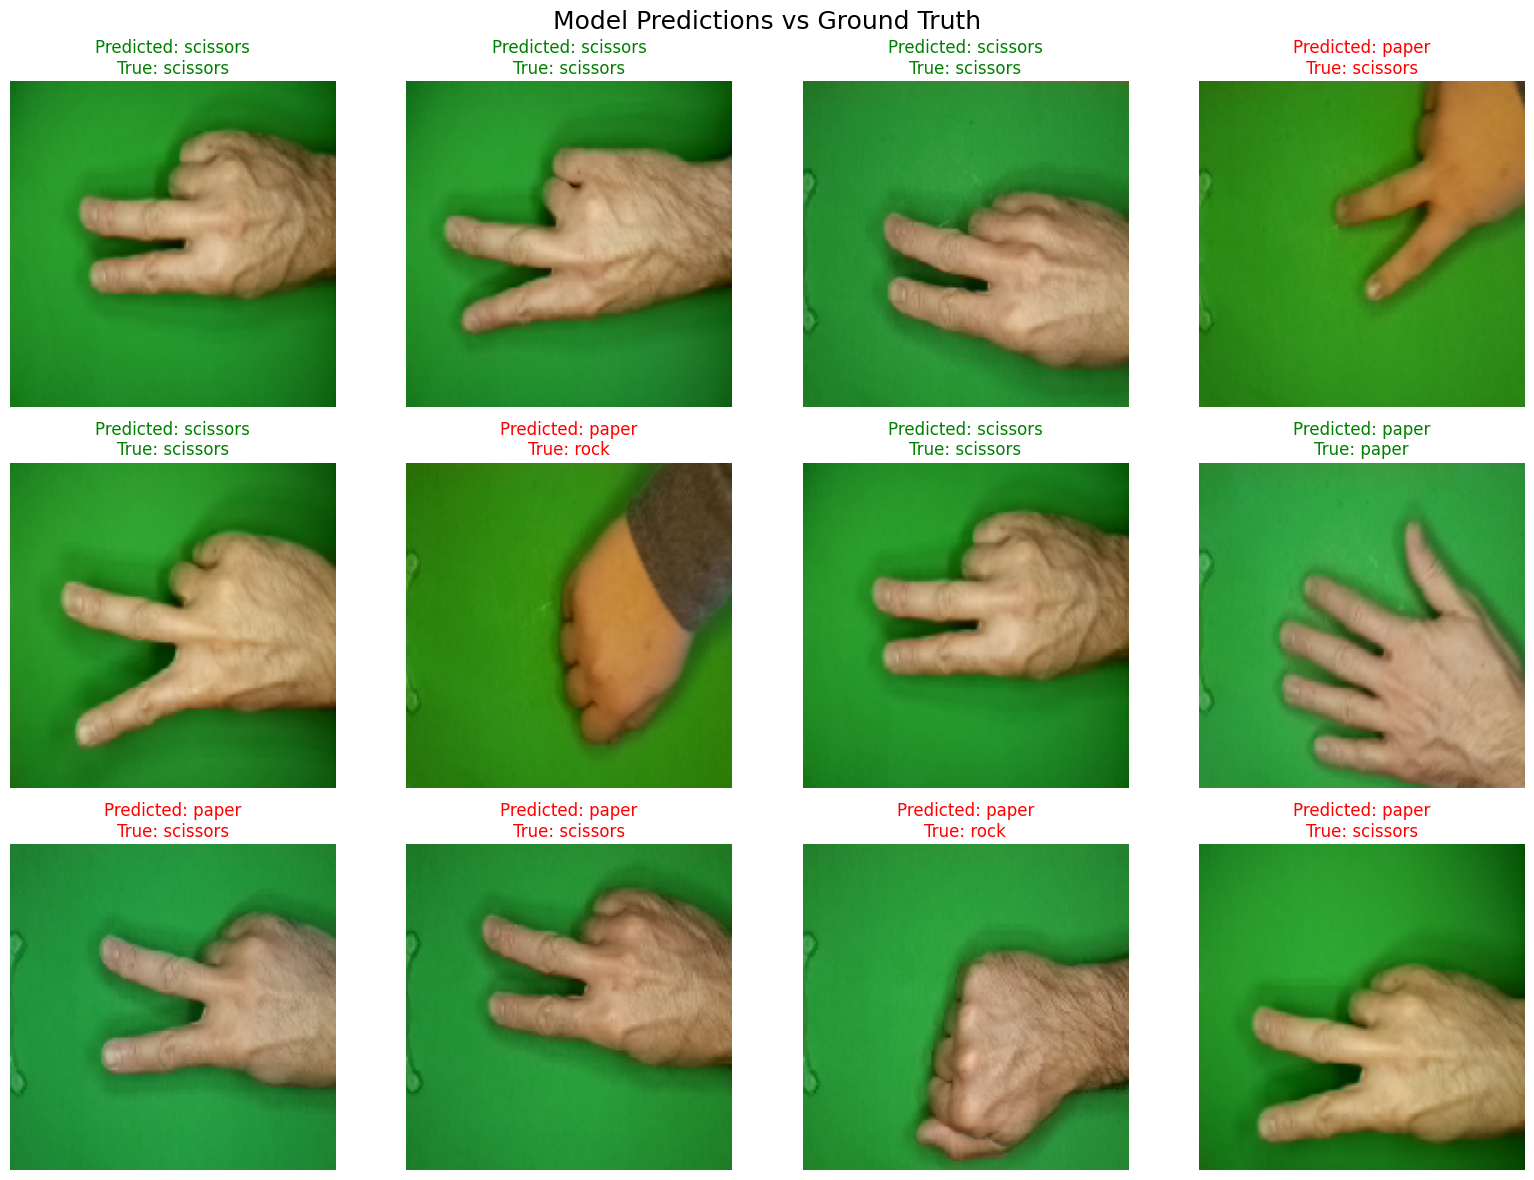

In [ ]:
import matplotlib.pyplot as plt
import random

# ✅ استخدم الصور والتوقعات من التقييم الأخير (مثلاً ResNet50 Fine-Tuned)
# إذا استخدمت نموذج آخر، غيّر y_pred_classes6_ft بالاسم المناسب
images_to_show = 12
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(16, 12))

for i in range(images_to_show):
    idx = random.randint(0, len(val_images) - 1)
    image = val_images[idx]
    true_label = class_names[y_true_classes[idx]]
    predicted_label = class_names[y_pred_classes6_ft[idx]]  # ← غيّر اسم المتغير حسب الموديل

    color = 'green' if true_label == predicted_label else 'red'
    title = f"Predicted: {predicted_label}\nTrue: {true_label}"

    plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(title, color=color)
    plt.axis('off')

plt.suptitle("Model Predictions vs Ground Truth", fontsize=18)
plt.tight_layout()
plt.show()


## Comparison of Model Accuracies

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


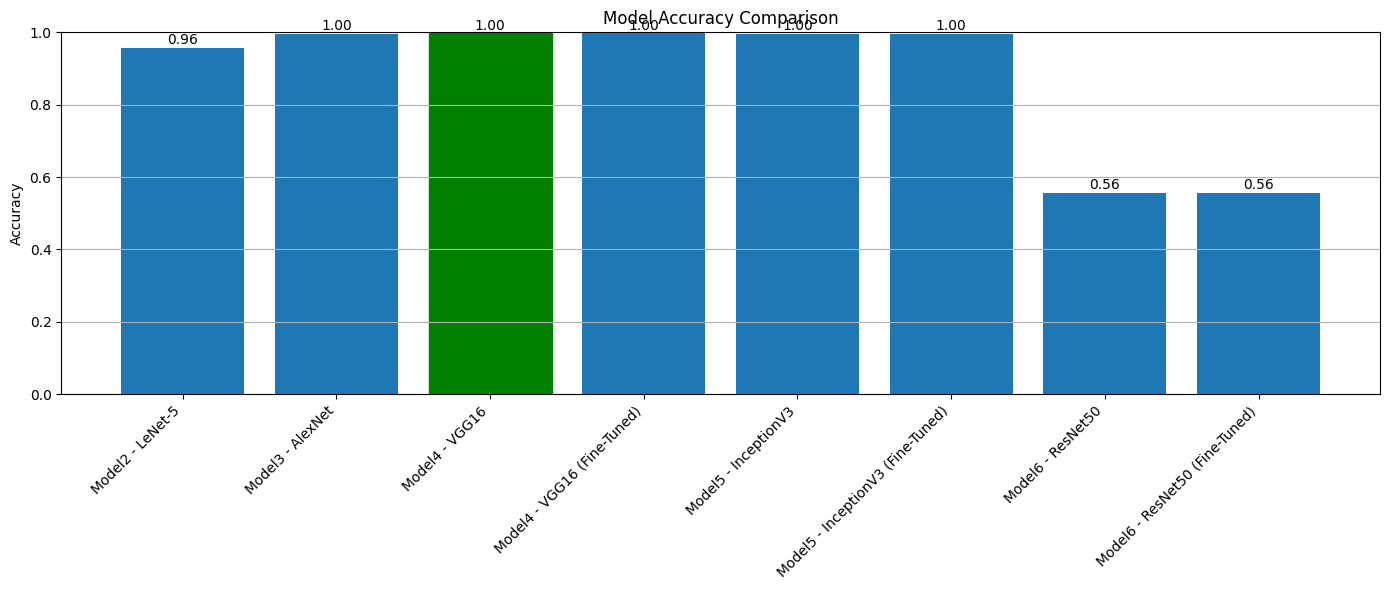

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# ✅ حساب التوقعات والدقة لكل نموذج

# LeNet-5
y_pred_classes2 = np.argmax(model2.predict(val_images), axis=1)
acc2 = accuracy_score(y_true_classes, y_pred_classes2)

# AlexNet
y_pred_classes3 = np.argmax(model3.predict(val_images), axis=1)
acc3 = accuracy_score(y_true_classes, y_pred_classes3)

# VGG16
y_pred_classes4 = np.argmax(model4.predict(val_images), axis=1)
acc4 = accuracy_score(y_true_classes, y_pred_classes4)

# VGG16 Fine-Tuned
y_pred_classes4_ft = np.argmax(model4.predict(val_images), axis=1)
acc4_ft = accuracy_score(y_true_classes, y_pred_classes4_ft)

# InceptionV3
y_pred_classes5 = np.argmax(model5.predict(val_images), axis=1)
acc5 = accuracy_score(y_true_classes, y_pred_classes5)

# InceptionV3 Fine-Tuned
y_pred_classes5_ft = np.argmax(model5.predict(val_images), axis=1)
acc5_ft = accuracy_score(y_true_classes, y_pred_classes5_ft)

# ResNet50
y_pred_classes6 = np.argmax(model6.predict(val_images), axis=1)
acc6 = accuracy_score(y_true_classes, y_pred_classes6)

# ResNet50 Fine-Tuned
y_pred_classes6_ft = np.argmax(model6.predict(val_images), axis=1)
acc6_ft = accuracy_score(y_true_classes, y_pred_classes6_ft)

# ✅ إنشاء القاموس
model_accuracies = {
    "Model2 - LeNet-5": acc2,
    "Model3 - AlexNet": acc3,
    "Model4 - VGG16": acc4,
    "Model4 - VGG16 (Fine-Tuned)": acc4_ft,
    "Model5 - InceptionV3": acc5,
    "Model5 - InceptionV3 (Fine-Tuned)": acc5_ft,
    "Model6 - ResNet50": acc6,
    "Model6 - ResNet50 (Fine-Tuned)": acc6_ft
}

# ✅ رسم المقارنة
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(14, 6))
bars = plt.bar(model_names, accuracies)

# تلوين الأعلى بالأخضر
best_index = accuracies.index(max(accuracies))
bars[best_index].set_color('green')

# عرض القيم
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## MobileNetV2 (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ✅ تحميل MobileNetV2 بدون الطبقة العلوية
base_model7 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# ✅ تجميد الطبقات الأساسية
for layer in base_model7.layers:
    layer.trainable = False

# ✅ رأس مخصص
x = base_model7.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model7 = Model(inputs=base_model7.input, outputs=output)

# ✅ التجميع
model7.compile(optimizer=Adam(learning_rate=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model7.summary()

# ✅ التدريب
history7 = model7.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


/tmp/ipython-input-37-3237846343.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model7 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 356ms/step - accuracy: 0.5235 - loss: 1.1895 - val_accuracy: 0.9680 - val_loss: 0.1818
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9164 - loss: 0.2495 - val_accuracy: 0.9748 - val_loss: 0.0989
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9588 - loss: 0.1453 - val_accuracy: 0.9771 - val_loss: 0.0757
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9683 - loss: 0.1185 - val_accuracy: 0.9863 - val_loss: 0.0561
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9729 - loss: 0.0833 - val_accuracy: 0.9863 - val_loss: 0.0485
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9861 - loss: 0.0596 - val_accuracy: 0.9908 - val_loss: 0.0410
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9931 - val_loss: 0.0352
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9888 - loss: 0.0414 - val_accuracy: 0

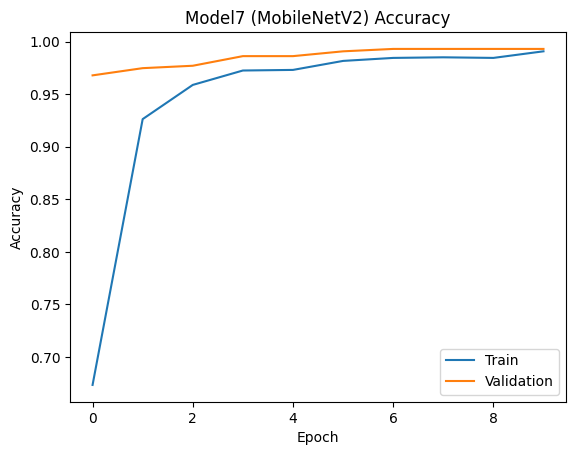

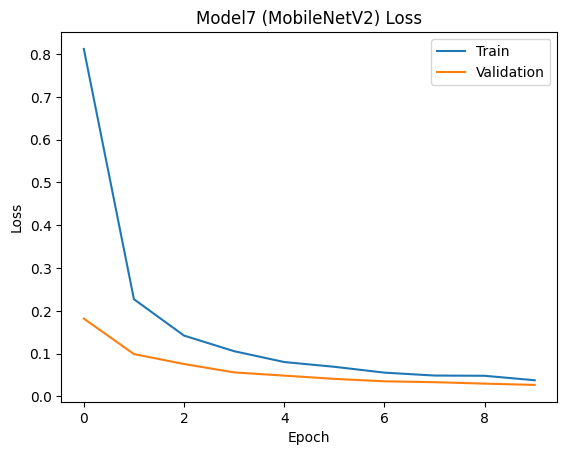

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history7.history['accuracy'], label='Train')
plt.plot(history7.history['val_accuracy'], label='Validation')
plt.title('Model7 (MobileNetV2) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history7.history['loss'], label='Train')
plt.plot(history7.history['val_loss'], label='Validation')
plt.title('Model7 (MobileNetV2) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step
✅ Model7 Accuracy: 0.9931

Classification Report:
              precision    recall  f1-score   support

       paper       0.99      0.99      0.99       142
        rock       1.00      0.99      1.00       145
    scissors       0.99      0.99      0.99       150

    accuracy                           0.99       437
   macro avg       0.99      0.99      0.99       437
weighted avg       0.99      0.99      0.99       437



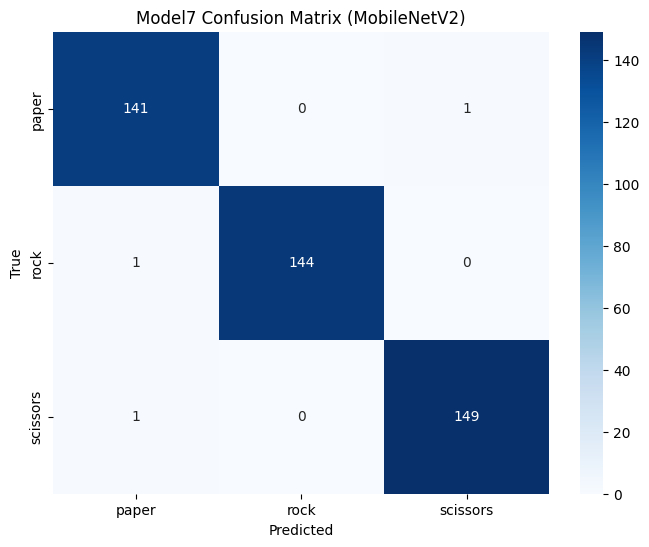

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ✅ التوقع
y_pred_classes7 = np.argmax(model7.predict(val_images), axis=1)
acc7 = accuracy_score(y_true_classes, y_pred_classes7)

print(f"✅ Model7 Accuracy: {acc7:.4f}")

# ✅ التقرير
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes7, target_names=class_names))

# ✅ Confusion Matrix
cm7 = confusion_matrix(y_true_classes, y_pred_classes7)
plt.figure(figsize=(8, 6))
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model7 Confusion Matrix (MobileNetV2)")
plt.show()


## EfficientNetB0 (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# ✅ تحميل EfficientNetB0 بدون الطبقة العلوية
base_model8 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# ✅ تجميد الطبقات الأساسية
for layer in base_model8.layers:
    layer.trainable = False

# ✅ رأس مخصص
x = base_model8.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model8 = Model(inputs=base_model8.input, outputs=output)

# ✅ تجميع النموذج
model8.compile(optimizer=Adam(learning_rate=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model8.summary()

# ✅ تدريب النموذج
history8 = model8.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,378,278 (16.70 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 46s 486ms/step - accuracy: 0.3306 - loss: 1.1334 - val_accuracy: 0.3432 - val_loss: 1.1205
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.3360 - loss: 1.1308 - val_accuracy: 0.3318 - val_loss: 1.1011
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3377 - loss: 1.1152 - val_accuracy: 0.3318 - val_loss: 1.0990
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.3161 - loss: 1.1120 - val_accuracy: 0.3432 - val_loss: 1.1039
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.3428 - loss: 1.1020 - val_accuracy: 0.3432 - val_loss: 1.0985
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3445 - loss: 1.0997 - val_accuracy: 0.3432 - val_loss: 1.0996
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3398 - loss: 1.1013 - val_accuracy: 0.3318 - val_loss: 1.0996
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.3429 - loss: 1.1017 - val_accuracy: 

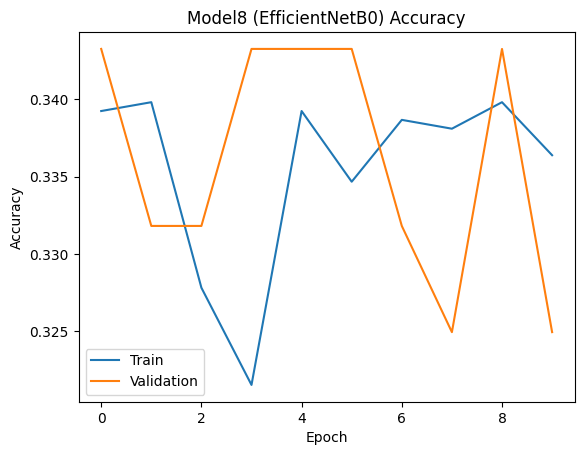

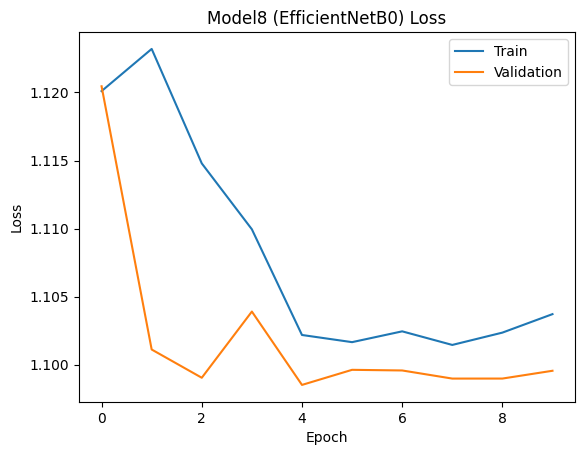

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history8.history['accuracy'], label='Train')
plt.plot(history8.history['val_accuracy'], label='Validation')
plt.title('Model8 (EfficientNetB0) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history8.history['loss'], label='Train')
plt.plot(history8.history['val_loss'], label='Validation')
plt.title('Model8 (EfficientNetB0) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 478ms/step
✅ Model8 Accuracy: 0.3249

Classification Report:
              precision    recall  f1-score   support

       paper       0.32      1.00      0.49       142
        rock       0.00      0.00      0.00       145
    scissors       0.00      0.00      0.00       150

    accuracy                           0.32       437
   macro avg       0.11      0.33      0.16       437
weighted avg       0.11      0.32      0.16       437



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


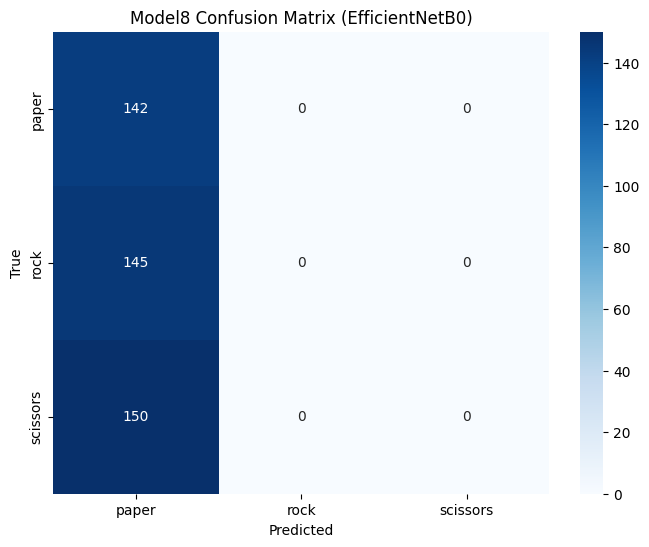

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ✅ التوقع
y_pred_classes8 = np.argmax(model8.predict(val_images), axis=1)
acc8 = accuracy_score(y_true_classes, y_pred_classes8)

print(f"✅ Model8 Accuracy: {acc8:.4f}")

# ✅ تقرير التصنيف
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes8, target_names=class_names))

# ✅ مصفوفة الالتباس
cm8 = confusion_matrix(y_true_classes, y_pred_classes8)
plt.figure(figsize=(8, 6))
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Model8 Confusion Matrix (EfficientNetB0)")
plt.show()


# Object Detection

 Dataset Name: Face Mask Detection
المصدر: Kaggle

المهمة: اكتشاف الأشخاص وتصنيفهم إلى:

with_mask

without_mask

mask_weared_incorrect

عدد الصور: ~853 صورة

تنسيق الملفات: YOLO format (صورة + ملف txt بنفس الاسم)

face_mask_data/

├── images/

│   ├── maksssksksss0.png

│   ├── ...

├── annotations/

│   ├── maksssksksss0.txt

│   ├── ...


In [ ]:
# إعداد الملف
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# تحميل الداتا
!kaggle datasets download -d andrewmvd/face-mask-detection

# فك الضغط داخل مجلد
!unzip -q face-mask-detection.zip -d face_mask_data


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 98% 389M/398M [00:00<00:00, 433MB/s]
100% 398M/398M [00:00<00:00, 495MB/s]


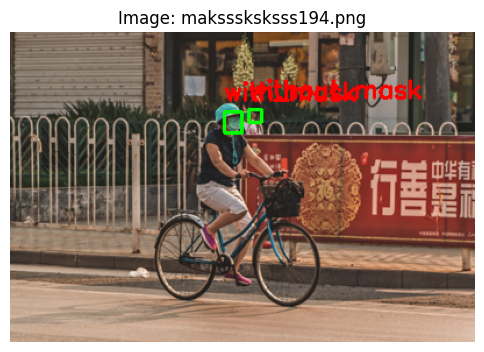

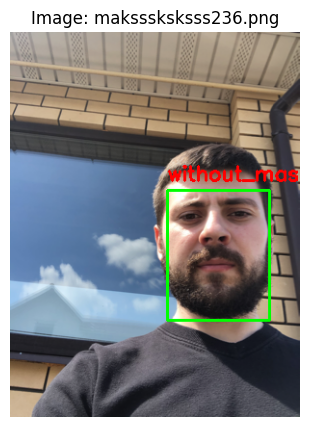

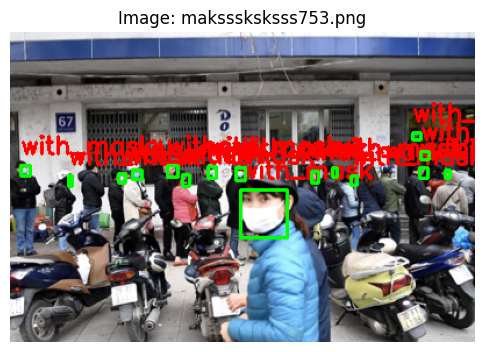

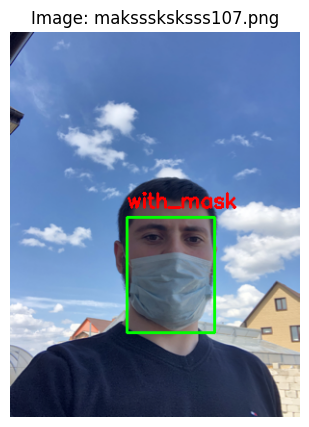

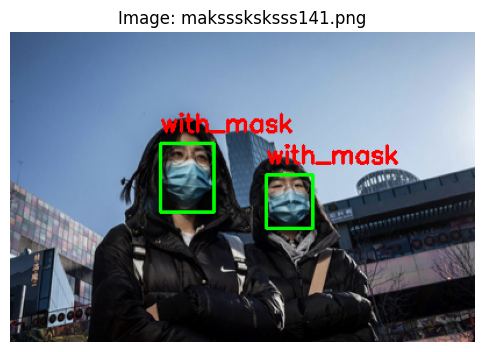

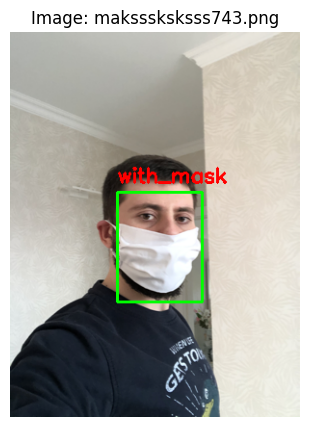

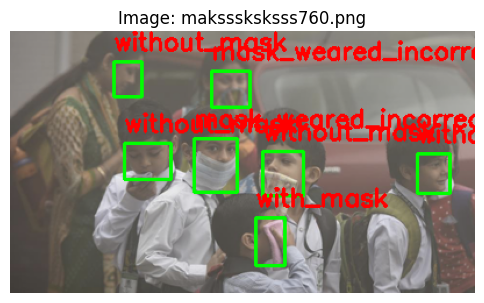

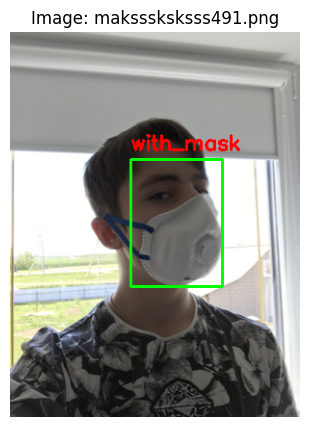

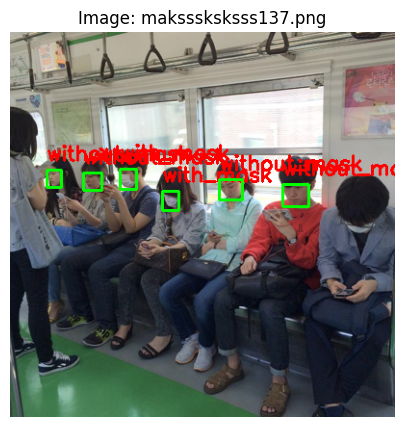

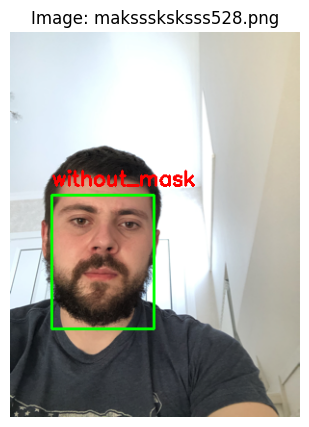

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# المسارات
images_dir = "face_mask_data/images"
annotations_dir = "face_mask_data/annotations"

# حصر أول 10 صور لها ملفات XML
matched_files = []
for img_file in os.listdir(images_dir):
    if img_file.endswith(".png"):
        xml_file = img_file.replace(".png", ".xml")
        if xml_file in os.listdir(annotations_dir):
            matched_files.append((img_file, xml_file))
        if len(matched_files) == 10:
            break

# عرض الصور مع البوكسات
for img_file, xml_file in matched_files:
    image_path = os.path.join(images_dir, img_file)
    xml_path = os.path.join(annotations_dir, xml_file)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tree = ET.parse(xml_path)
    root = tree.getroot()

    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        x1 = int(bbox.find('xmin').text)
        y1 = int(bbox.find('ymin').text)
        x2 = int(bbox.find('xmax').text)
        y2 = int(bbox.find('ymax').text)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # عرض الصورة
    plt.figure(figsize=(6, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image: {img_file}")
    plt.show()


## VOC to YOLO Format Conversion for Face Mask Detection

In [ ]:
import os
import xml.etree.ElementTree as ET

# المسارات
images_dir = "face_mask_data/images"
annotations_dir = "face_mask_data/annotations"
yolo_labels_dir = "face_mask_data/yolo_labels"

# إنشاء مجلد جديد لليولو إن لم يكن موجود
os.makedirs(yolo_labels_dir, exist_ok=True)

# تعيين تسميات الأصناف (مهمة في تصدير class_id)
classes = ["with_mask", "without_mask", "mask_weared_incorrect"]

# تحويل كل ملف XML
for xml_file in os.listdir(annotations_dir):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(annotations_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    img_filename = root.find('filename').text
    img_path = os.path.join(images_dir, img_filename)

    # حجم الصورة
    size = root.find("size")
    img_w = int(size.find("width").text)
    img_h = int(size.find("height").text)

    # اسم ملف إخراج yolo
    yolo_filename = xml_file.replace(".xml", ".txt")
    yolo_path = os.path.join(yolo_labels_dir, yolo_filename)

    with open(yolo_path, "w") as f:
        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in classes:
                continue
            class_id = classes.index(class_name)

            bbox = obj.find("bndbox")
            x1 = int(bbox.find("xmin").text)
            y1 = int(bbox.find("ymin").text)
            x2 = int(bbox.find("xmax").text)
            y2 = int(bbox.find("ymax").text)

            x_center = ((x1 + x2) / 2) / img_w
            y_center = ((y1 + y2) / 2) / img_h
            width = (x2 - x1) / img_w
            height = (y2 - y1) / img_h

            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print("✅ Done converting all XML files to YOLO format.")


✅ Done converting all XML files to YOLO format.


## Splitting the YOLO Dataset into Train, Validation, and Test Sets

In [ ]:
import os
import shutil
import random

# مسارات الملفات الأصلية
images_dir = "face_mask_data/images"
labels_dir = "face_mask_data/yolo_labels"

# الوجهة النهائية
base_output = "face_mask_yolo"
for split in ["train", "val", "test"]:
    os.makedirs(f"{base_output}/images/{split}", exist_ok=True)
    os.makedirs(f"{base_output}/labels/{split}", exist_ok=True)

# كل الصور التي لها ملف label مطابق
all_images = [
    f for f in os.listdir(images_dir)
    if f.endswith(".png") and os.path.exists(os.path.join(labels_dir, f.replace(".png", ".txt")))
]

# Shuffle وتقسيم
random.seed(42)
random.shuffle(all_images)

train_split = int(0.7 * len(all_images))
val_split = int(0.9 * len(all_images))

train_files = all_images[:train_split]
val_files = all_images[train_split:val_split]
test_files = all_images[val_split:]

splits = [("train", train_files), ("val", val_files), ("test", test_files)]

# نسخ الصور والليبلات
for split_name, files in splits:
    for filename in files:
        # صورة
        src_img = os.path.join(images_dir, filename)
        dst_img = os.path.join(base_output, "images", split_name, filename)
        shutil.copyfile(src_img, dst_img)

        # الليبل
        label_name = filename.replace(".png", ".txt")
        src_lbl = os.path.join(labels_dir, label_name)
        dst_lbl = os.path.join(base_output, "labels", split_name, label_name)
        shutil.copyfile(src_lbl, dst_lbl)

print("✅ Dataset split into train / val / test and saved to 'face_mask_yolo/'")


✅ Dataset split into train / val / test and saved to 'face_mask_yolo/'


## Creating the data.yaml File for YOLOv8 Training

هو ملف بسيط بصيغة YAML يشرح لـ YOLOv8:

وين موجود مجلد الصور لكل من train و val

كم عدد الكلاسات؟

شو أسماء الكلاسات؟ (labels)

In [ ]:
import yaml

data_yaml = {
    'train': '/content/face_mask_yolo/images/train',
    'val': '/content/face_mask_yolo/images/val',
    'test': '/content/face_mask_yolo/images/test',  # Optional
    'nc': 3,
    'names': ['with_mask', 'without_mask', 'mask_weared_incorrect']
}

# حفظ الملف
with open("face_mask_data.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data.yaml file created!")


✅ data.yaml file created!


## Installing Ultralytics and Training YOLOv8 on Custom Face Mask Dataset

 1. Ultralytics YOLOv5/YOLOv8
 الأشهر والأبسط للتجريب.

سهل الاستخدام في Google Colab.

 يدعم training / inference / export بسهولة.

 متوافق مع تنسيق YOLO مباشرة (مثل ما جهزناه).

In [ ]:
!pip install ultralytics --upgrade -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 871.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# تحميل نموذج جاهز من YOLOv8
model = YOLO("yolov8n.pt")  # يمكنك استخدام yolov8s.pt أو m أو l أو x

# تدريب النموذج
model.train(
    data="face_mask_data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolo_face_mask",
    pretrained=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.6MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=face_mask_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_face_mask, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 85.5±36.9 MB/s, size: 498.3 KB)


train: Scanning /content/face_mask_yolo/labels/train... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:02<00:00, 234.65it/s]

train: New cache created: /content/face_mask_yolo/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 62.1±17.1 MB/s, size: 405.6 KB)


val: Scanning /content/face_mask_yolo/labels/val... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<00:00, 206.27it/s]

val: New cache created: /content/face_mask_yolo/labels/val.cache


Plotting labels to runs/detect/yolo_face_mask/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_face_mask
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.25G      1.767      2.766      1.399         42        640: 100%|██████████| 38/38 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        170        980     0.0104      0.343      0.103     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.28G      1.407      1.562      1.094         52        640: 100%|██████████| 38/38 [00:14<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


                   all        170        980       0.46      0.194      0.308      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.3G      1.259      1.294      1.057        128        640: 100%|██████████| 38/38 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        170        980      0.581      0.394      0.458      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.33G      1.249      1.162      1.042         64        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        170        980      0.478      0.469      0.496      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.33G      1.233      1.083       1.04         49        640: 100%|██████████| 38/38 [00:17<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        170        980      0.546      0.502      0.499       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.36G      1.209      1.003      1.023         35        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        170        980      0.644      0.539       0.61      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.37G      1.194     0.9341      1.016         20        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        170        980      0.671      0.584      0.634      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.39G      1.217     0.9195      1.015        100        640: 100%|██████████| 38/38 [00:14<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]


                   all        170        980      0.582      0.566      0.613      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.4G      1.139     0.8593      1.013         28        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        170        980      0.616      0.587      0.607      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.43G      1.133     0.8381      1.006         34        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        170        980      0.731      0.619      0.671      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.44G      1.125     0.8153     0.9978         82        640: 100%|██████████| 38/38 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        170        980      0.885       0.55      0.682      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.46G      1.128     0.7941      0.992         40        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        170        980      0.801      0.637      0.724      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.47G      1.085     0.7551     0.9855         27        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        170        980      0.681      0.646      0.683      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.5G      1.087     0.7582     0.9776         28        640: 100%|██████████| 38/38 [00:14<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


                   all        170        980      0.778      0.614      0.699      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.51G       1.11     0.7442      0.987         66        640: 100%|██████████| 38/38 [00:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]


                   all        170        980      0.814       0.59      0.689      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.53G      1.109     0.7452      0.991         17        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        170        980      0.799      0.675      0.739      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.54G      1.063     0.7169     0.9773         32        640: 100%|██████████| 38/38 [00:14<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]


                   all        170        980      0.855      0.639       0.73      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.56G      1.088     0.7145      0.978         44        640: 100%|██████████| 38/38 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        170        980      0.732      0.649      0.701      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.57G       1.04     0.6825     0.9698         69        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        170        980      0.811      0.661      0.743      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.6G      1.061     0.6795     0.9623         25        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        170        980      0.869       0.69       0.77      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.61G      1.061     0.6898     0.9674         22        640: 100%|██████████| 38/38 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        170        980      0.862      0.651      0.746      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.63G      1.059      0.672     0.9697         30        640: 100%|██████████| 38/38 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        170        980      0.862      0.687       0.78      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.64G      1.038     0.6472     0.9702         28        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        170        980      0.802      0.679      0.761      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.67G      1.053      0.642     0.9569         57        640: 100%|██████████| 38/38 [00:14<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        170        980      0.822      0.717      0.775      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.68G      1.033     0.6307     0.9679         21        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all        170        980      0.892      0.683      0.788      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.7G      1.036     0.6269     0.9655         39        640: 100%|██████████| 38/38 [00:14<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        170        980      0.904      0.672      0.778      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.71G     0.9826     0.5901      0.946         60        640: 100%|██████████| 38/38 [00:14<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        170        980      0.917      0.668      0.794      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.74G     0.9936     0.5908      0.951         68        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        170        980      0.817      0.681      0.769      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.74G     0.9891     0.5893     0.9491         36        640: 100%|██████████| 38/38 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]


                   all        170        980      0.794      0.707      0.772      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.77G     0.9936     0.5806     0.9477         30        640: 100%|██████████| 38/38 [00:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        170        980       0.86      0.664      0.768      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.78G      1.012      0.589     0.9541         65        640: 100%|██████████| 38/38 [00:13<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        170        980      0.867      0.678      0.771      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.8G     0.9875     0.5913     0.9519         64        640: 100%|██████████| 38/38 [00:14<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        170        980      0.902      0.637      0.778      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.81G      1.003     0.5734     0.9447         15        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]


                   all        170        980      0.818      0.689      0.786      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.84G     0.9791     0.5719     0.9504        124        640: 100%|██████████| 38/38 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        170        980       0.84      0.709      0.792      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.85G     0.9677     0.5555      0.936         33        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        170        980      0.867      0.726      0.794      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.87G      0.957     0.5444     0.9384         38        640: 100%|██████████| 38/38 [00:13<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        170        980      0.905      0.718      0.797      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.88G     0.9479     0.5402     0.9318         43        640: 100%|██████████| 38/38 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        170        980      0.852      0.708      0.802      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.91G     0.9503     0.5288     0.9347         26        640: 100%|██████████| 38/38 [00:13<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]

                   all        170        980      0.895      0.695      0.807      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.91G     0.9315     0.5304     0.9302         32        640: 100%|██████████| 38/38 [00:14<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        170        980      0.937      0.698      0.802      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.95G     0.9146     0.5131     0.9224         13        640: 100%|██████████| 38/38 [00:14<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        170        980       0.91      0.717      0.807      0.536


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.95G     0.9187     0.5145     0.9227         25        640: 100%|██████████| 38/38 [00:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        170        980      0.828      0.725      0.805      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.97G      0.917     0.5021     0.9213         27        640: 100%|██████████| 38/38 [00:13<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]


                   all        170        980      0.886      0.715      0.811      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.99G     0.8915     0.4796      0.906         10        640: 100%|██████████| 38/38 [00:14<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        170        980      0.908      0.672        0.8      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.01G     0.8833     0.4719     0.9132         21        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        170        980      0.823      0.738       0.81      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.02G     0.8881     0.4674     0.9111         15        640: 100%|██████████| 38/38 [00:13<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

                   all        170        980      0.906      0.691      0.794      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.04G     0.8764     0.4656     0.9062         26        640: 100%|██████████| 38/38 [00:13<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        170        980      0.901      0.706      0.816      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.05G     0.8771     0.4641     0.9092         18        640: 100%|██████████| 38/38 [00:13<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        170        980       0.88      0.704      0.804      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.08G     0.8597     0.4545     0.9011         16        640: 100%|██████████| 38/38 [00:13<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        170        980      0.876      0.732      0.809      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.09G     0.8491     0.4485     0.8992         11        640: 100%|██████████| 38/38 [00:13<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        170        980      0.926      0.727      0.814      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.11G      0.863     0.4469     0.9057         10        640: 100%|██████████| 38/38 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        170        980      0.929      0.705      0.812      0.546



50 epochs completed in 0.240 hours.
Optimizer stripped from runs/detect/yolo_face_mask/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_face_mask/weights/best.pt, 6.2MB

Validating runs/detect/yolo_face_mask/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]


                   all        170        980      0.927      0.727      0.814      0.551
             with_mask        154        781      0.949      0.866      0.943      0.644
          without_mask         69        166       0.83      0.771      0.829       0.54
 mask_weared_incorrect         25         33          1      0.543       0.67      0.469
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/yolo_face_mask


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ab901bff50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# إعادة تحميل النموذج الأفضل من نتائج التدريب
best_model = YOLO("runs/detect/yolo_face_mask/weights/best.pt")

# تقييم على val set
metrics = best_model.val()


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2694.1±792.5 MB/s, size: 363.8 KB)


val: Scanning /content/face_mask_yolo/labels/val.cache... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.39it/s]


                   all        170        980      0.928      0.727      0.814      0.554
             with_mask        154        781      0.952      0.868      0.944      0.646
          without_mask         69        166      0.831      0.771      0.829      0.545
 mask_weared_incorrect         25         33          1      0.542      0.669       0.47
Speed: 7.8ms preprocess, 15.3ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import os

# اختيار بعض الصور من test
test_images = os.listdir("/content/face_mask_yolo/images/test")[:10]  # أول 10 صور

# تطبيق الكشف وعرض النتائج
for img_file in test_images:
    img_path = f"/content/face_mask_yolo/images/test/{img_file}"
    results = best_model.predict(img_path, save=True, conf=0.3)



image 1/1 /content/face_mask_yolo/images/test/maksssksksss760.png: 384x640 3 with_masks, 3 without_masks, 40.7ms
Speed: 2.0ms preprocess, 40.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/face_mask_yolo/images/test/maksssksksss633.png: 640x640 1 with_mask, 11.1ms
Speed: 3.3ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/face_mask_yolo/images/test/maksssksksss237.png: 448x640 2 with_masks, 41.9ms
Speed: 2.1ms preprocess, 41.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

image 1/1 /content/face_mask_yolo/images/test/maksssksksss791.png: 640x512 1 with_mask, 43.6ms
Speed: 2.1ms preprocess, 43.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict

image 1/1 /content/face_mask_yolo/images/test/maksssksksss18

In [ ]:
from google.colab import files

# رفع صورة من جهازك
uploaded = files.upload()

# التنبؤ عليها
for filename in uploaded.keys():
    best_model.predict(source=filename, save=True, conf=0.3)


Saving 90569f11-7946-4069-8a33-4022670778dc.jpeg to 90569f11-7946-4069-8a33-4022670778dc.jpeg

image 1/1 /content/90569f11-7946-4069-8a33-4022670778dc.jpeg: 640x480 1 without_mask, 43.7ms
Speed: 3.1ms preprocess, 43.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


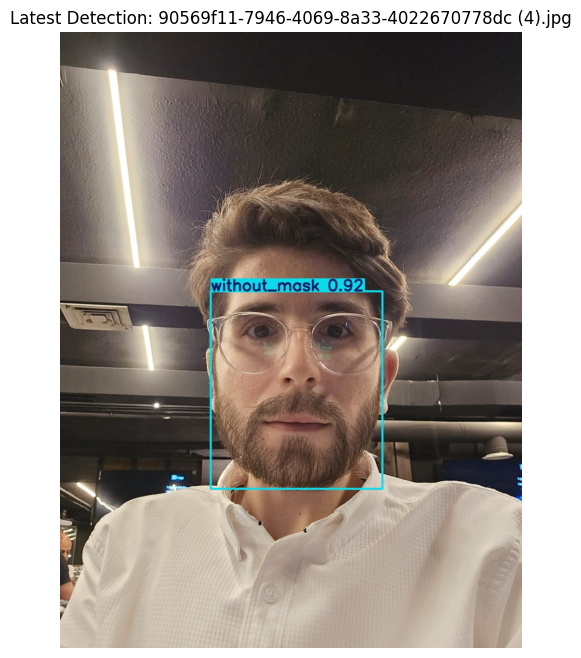

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# 🔍 البحث عن آخر صورة تم إنشاؤها في مجلد النتائج
predicted_images = glob.glob("runs/detect/predict/*.jpg") + glob.glob("runs/detect/predict/*.jpeg") + glob.glob("runs/detect/predict/*.png")
latest_image = max(predicted_images, key=os.path.getctime)

# ✅ عرض الصورة
img = Image.open(latest_image)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Latest Detection: {os.path.basename(latest_image)}")
plt.show()


## Saving Trained YOLOv8 Model

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")  # أو yolov8s.yaml / yolov8m.yaml حسب الحجم
model.train(data="face_mask_data.yaml", epochs=20)


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=face_mask_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning /content/face_mask_yolo/labels/train.cache... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 883.0±935.0 MB/s, size: 405.6 KB)


val: Scanning /content/face_mask_yolo/labels/val.cache... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.46G      4.036      4.784       4.17         42        640: 100%|██████████| 38/38 [00:17<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        170        980   0.000292     0.0123   0.000151   4.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.37G      3.414      4.179      3.796         52        640: 100%|██████████| 38/38 [00:17<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        170        980   0.000883     0.0388    0.00634   0.000724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.37G      2.737       3.28      2.891        128        640: 100%|██████████| 38/38 [00:16<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        170        980      0.678     0.0162    0.00563    0.00288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.37G      2.419      2.699      2.364         64        640: 100%|██████████| 38/38 [00:17<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        170        980      0.792     0.0627     0.0648       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.37G      2.252      2.415      2.127         49        640: 100%|██████████| 38/38 [00:17<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        170        980      0.555      0.147      0.162     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.37G      2.101      2.035      1.929         35        640: 100%|██████████| 38/38 [00:21<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        170        980      0.718      0.192      0.217      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.37G      1.964      1.826      1.801         20        640: 100%|██████████| 38/38 [00:17<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        170        980      0.705      0.252      0.279       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.37G      1.937      1.759      1.724        100        640: 100%|██████████| 38/38 [00:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]


                   all        170        980      0.341      0.282      0.299      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.37G      1.829       1.63      1.693         28        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


                   all        170        980      0.304      0.291      0.283      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.37G      1.809      1.577       1.65         34        640: 100%|██████████| 38/38 [00:17<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        170        980      0.746      0.291      0.327      0.173


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.37G      1.629      1.649      1.594          9        640: 100%|██████████| 38/38 [00:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        170        980      0.799      0.304      0.364      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.37G      1.615      1.514      1.551         18        640: 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        170        980      0.776      0.318      0.369      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.37G      1.564      1.445      1.507         15        640: 100%|██████████| 38/38 [00:17<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        170        980        0.8      0.351      0.401      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.37G       1.56      1.391      1.495         32        640: 100%|██████████| 38/38 [00:17<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        170        980      0.823      0.349      0.402      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.37G       1.57      1.356      1.484         21        640: 100%|██████████| 38/38 [00:16<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]


                   all        170        980      0.819      0.341      0.404      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.37G      1.519      1.287      1.452         22        640: 100%|██████████| 38/38 [00:18<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]


                   all        170        980      0.851       0.36      0.424      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.37G      1.501      1.272      1.429         21        640: 100%|██████████| 38/38 [00:16<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        170        980      0.505      0.381      0.439      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.37G      1.486      1.235      1.441         19        640: 100%|██████████| 38/38 [00:18<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        170        980      0.504      0.359      0.427       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.37G      1.452      1.214      1.417         30        640: 100%|██████████| 38/38 [00:17<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        170        980       0.54      0.362      0.439      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.37G      1.459      1.201      1.412         29        640: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        170        980      0.891       0.36      0.444      0.259



20 epochs completed in 0.119 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]


                   all        170        980       0.54      0.362      0.439      0.261
             with_mask        154        781      0.829      0.676      0.753      0.465
          without_mask         69        166      0.789       0.41      0.505      0.282
 mask_weared_incorrect         25         33          0          0      0.058     0.0355
Speed: 0.9ms preprocess, 3.5ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ab909acc90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Load YOLOv8 Saved Model and Detect Objects on Uploaded Image

Saving 90b2b711-7b01-4684-8e2c-548e18b946df.jpeg to 90b2b711-7b01-4684-8e2c-548e18b946df.jpeg

image 1/1 /content/90b2b711-7b01-4684-8e2c-548e18b946df.jpeg: 640x480 1 with_mask, 9.2ms
Speed: 3.1ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


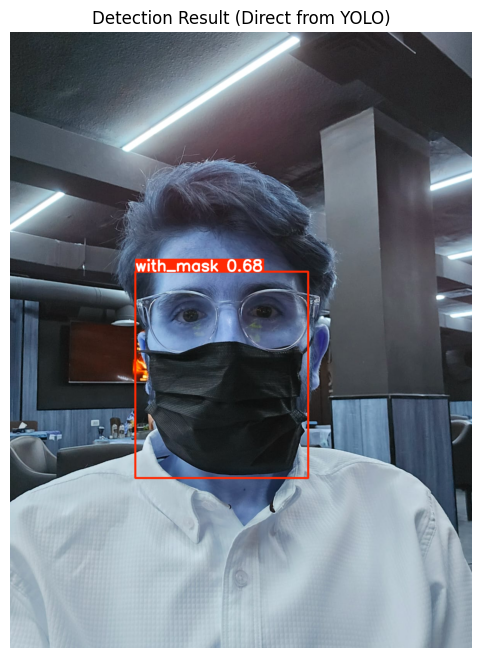

In [ ]:
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt

# ✅ 1. رفع الصورة
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# ✅ 2. تحميل النموذج
model = YOLO("runs/detect/train/weights/best.pt")

# ✅ 3. الكشف على الصورة
results = model(image_path)

# ✅ 4. عرض الصورة مع الباوندنج بوكس مباشرة من النتائج (بدون ملفات خارجية)
img_with_boxes = results[0].plot()

plt.figure(figsize=(10, 8))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.title("Detection Result (Direct from YOLO)")
plt.show()


Saving 90b2b711-7b01-4684-8e2c-548e18b946df.jpeg to 90b2b711-7b01-4684-8e2c-548e18b946df (1).jpeg

image 1/1 /content/90b2b711-7b01-4684-8e2c-548e18b946df (1).jpeg: 640x480 1 with_mask, 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


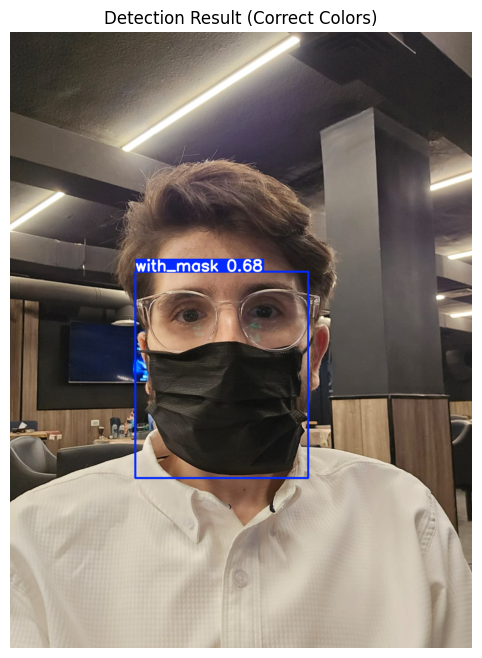

In [ ]:
import cv2
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt

# ✅ 1. رفع الصورة
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# ✅ 2. تحميل النموذج
model = YOLO("runs/detect/train/weights/best.pt")

# ✅ 3. الكشف على الصورة
results = model(image_path)

# ✅ 4. عرض الصورة مع الباوندنج بوكس، وتحويلها من BGR إلى RGB
img_with_boxes = results[0].plot()
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Detection Result (Correct Colors)")
plt.show()
